<a href="https://colab.research.google.com/github/kunal51298/Bank_Marketing_Effectiveness_Prediction1/blob/main/Bank_Marketing_Effectiveness_Prediction_kunal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Title : Predicting the effectiveness of bank marketing campaigns

#Problem Description
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).

## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Project 3/Copy of bank-full.csv",delimiter=';')

#EDA

In [4]:
df.shape

(45211, 17)

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [7]:
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7482,53,blue-collar,married,secondary,no,1852,yes,no,unknown,29,may,134,4,-1,0,unknown,no
20861,52,management,single,tertiary,no,556,no,no,cellular,13,aug,733,6,-1,0,unknown,no
15894,51,blue-collar,divorced,primary,no,0,yes,no,cellular,21,jul,322,2,-1,0,unknown,no
26798,31,management,married,tertiary,no,6290,no,no,cellular,20,nov,303,2,-1,0,unknown,no
5729,30,admin.,married,secondary,no,-170,yes,yes,unknown,26,may,130,1,-1,0,unknown,no
11492,59,entrepreneur,married,primary,no,0,no,no,unknown,19,jun,239,1,-1,0,unknown,no
28330,43,self-employed,married,secondary,no,2940,no,no,cellular,29,jan,108,1,-1,0,unknown,no
41794,63,retired,married,primary,no,1084,no,no,cellular,14,oct,201,1,183,1,success,no
24845,38,technician,married,tertiary,no,2453,yes,yes,cellular,18,nov,108,1,-1,0,unknown,no
29082,27,services,married,primary,no,921,no,no,cellular,2,feb,141,1,-1,0,unknown,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
df1=df.copy()


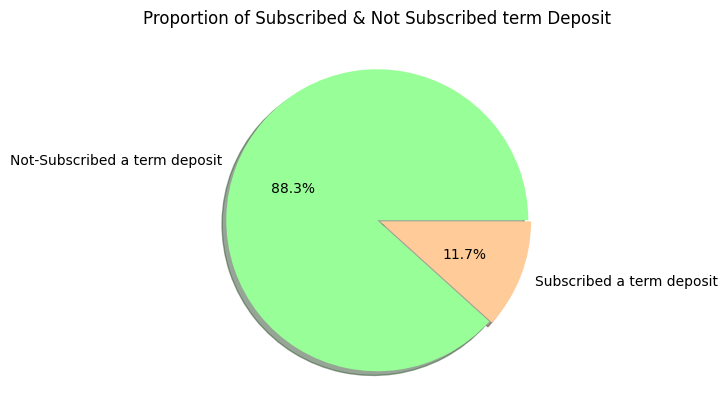

In [12]:
plt.figure(figsize=(7,5), dpi=100)
proportion = df1['y'].value_counts()
labels = ['Not-Subscribed a term deposit','Subscribed a term deposit']
plt.title('Proportion of Subscribed & Not Subscribed term Deposit')
plt.pie(proportion, explode=(0,0.02),labels=labels, shadow = True, autopct = '%1.1f%%', colors= ['#98ff98','#ffcc99'])
plt.show()

We can see from the above plot that the dataset is imbalanced, where the number

of Subscribed class is close to 8 times the number of Not-Subscribed Class.

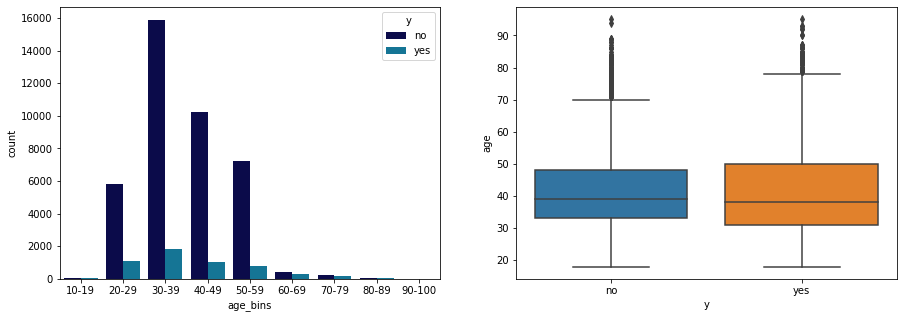

In [13]:
df1['age_bins'] = pd.cut(x=df1['age'], bins=[10,20,30,40,50,60,70,80,90,100],labels=['10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-100'])

fig, axes = plt.subplots(1, 2,figsize = (15,5))
sns.countplot(x='age_bins',data=df1, palette='ocean',hue='y',ax = axes[0])
sns.boxplot(x=df1['y'],y=df1['age'],ax = axes[1]);

* Majority of the customers are of the age group 30-39. Followed by 40-49 and 50-59.
* The box plot for both the subscribed and not-subscribed customers looks the same.
* In No class, outliers are present above age 70 and for Yes class, outliers are present above age 75.

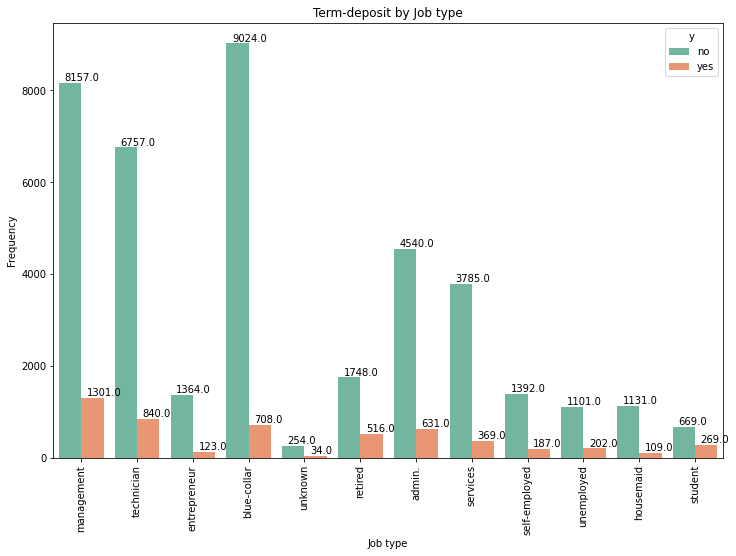

In [14]:
plt.figure(figsize=(12,8))
ax = sns.countplot(df1['job'],hue = df1['y'], data=df1,palette ='Set2' )
plt.title('Term-deposit by Job type')
plt.xlabel('Job type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [15]:
df1.groupby(['job','y'])['y'].count()/df1.groupby('job')['y'].count()

job            y  
admin.         no     0.877973
               yes    0.122027
blue-collar    no     0.927250
               yes    0.072750
entrepreneur   no     0.917283
               yes    0.082717
housemaid      no     0.912097
               yes    0.087903
management     no     0.862444
               yes    0.137556
retired        no     0.772085
               yes    0.227915
self-employed  no     0.881571
               yes    0.118429
services       no     0.911170
               yes    0.088830
student        no     0.713220
               yes    0.286780
technician     no     0.889430
               yes    0.110570
unemployed     no     0.844973
               yes    0.155027
unknown        no     0.881944
               yes    0.118056
Name: y, dtype: float64

Majority of the customers contacted by the bank have blue collar jobs but the chances of taking a term deposit is higher in student and retired profesionals.

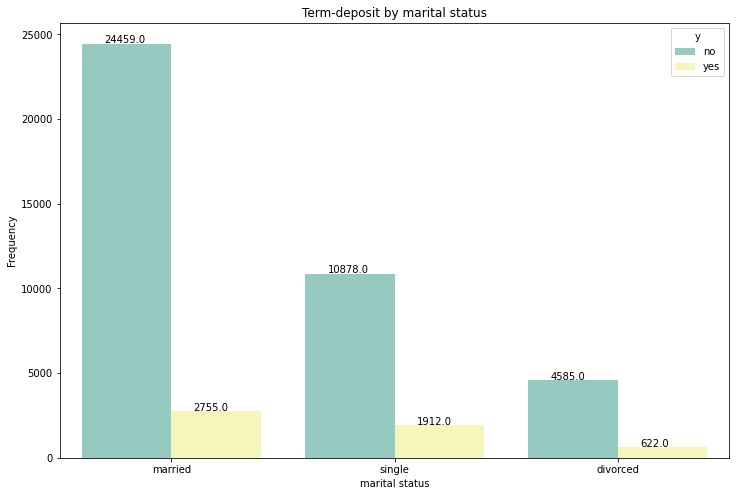

In [16]:
plt.figure(figsize=(12,8))
ax = sns.countplot(df1['marital'],hue = df1['y'], data=df1,palette ='Set3' )
plt.title('Term-deposit by marital status')
plt.xlabel('marital status')
plt.ylabel('Frequency')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Majority of the customers are married. Followed by Single, divorced and unknown.

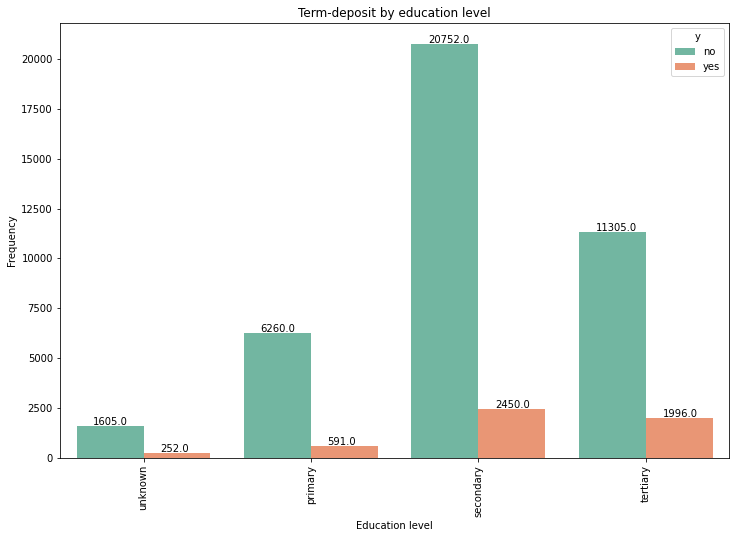

In [17]:
plt.figure(figsize=(12,8))
ax = sns.countplot(df1['education'],hue = df1['y'], data=df1,palette ='Set2',order=['unknown','primary','secondary','tertiary'] )
plt.title('Term-deposit by education level')
plt.xlabel('Education level')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [18]:
df1.groupby(['education','y'])['y'].count()/df1.groupby('education')['y'].count()

education  y  
primary    no     0.913735
           yes    0.086265
secondary  no     0.894406
           yes    0.105594
tertiary   no     0.849936
           yes    0.150064
unknown    no     0.864297
           yes    0.135703
Name: y, dtype: float64

Majority of the customers have secondary education as the highest level of education and people who have attained upto tertiary level of education have higher probability to take a term deposit.

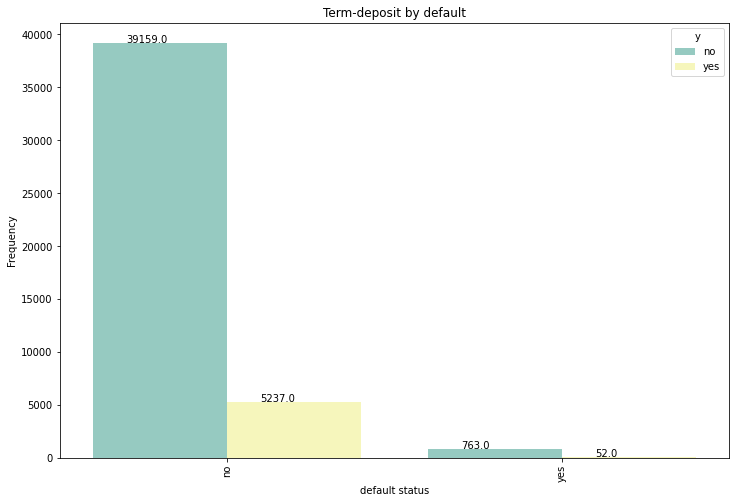

In [19]:
plt.figure(figsize=(12,8))
ax = sns.countplot(df1['default'],hue = df1['y'], data=df1,palette ='Set3' )
plt.title('Term-deposit by default')
plt.xlabel('default status')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

We can clearly see that the people with default status as ‘no’ are the most who have been contacted by the bank for the deposits. People with default status ‘yes’ have not been contacted by the bank at all.

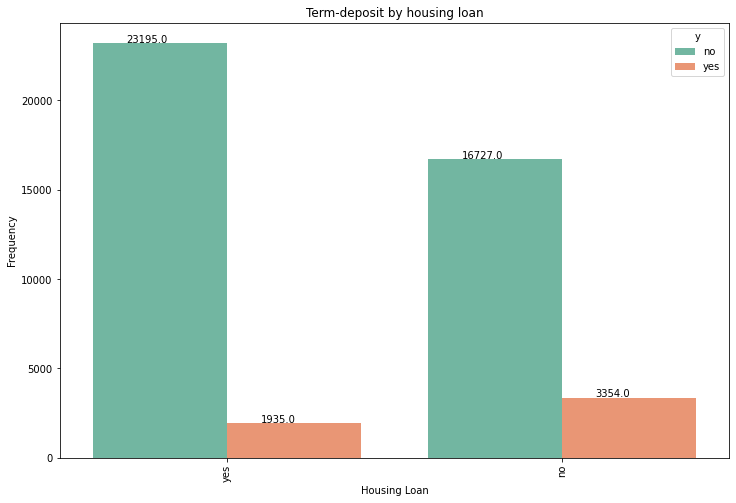

In [20]:
plt.figure(figsize=(12,8))
ax = sns.countplot(df1['housing'],hue = df1['y'], data=df1,palette ='Set2' )
plt.title('Term-deposit by housing loan')
plt.xlabel('Housing Loan')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))


Majority of the customers have a housing loan.But those who do not have a housing loan are more likely to subscribe to a term-deposit.

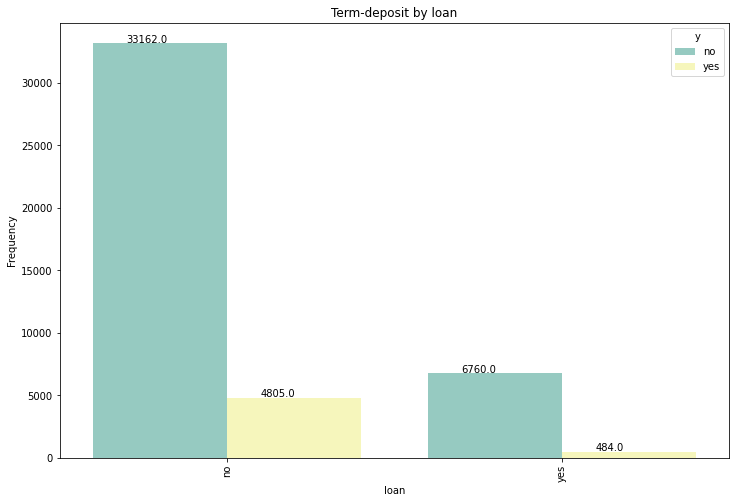

In [21]:
plt.figure(figsize=(12,8))
ax = sns.countplot(df1['loan'],hue = df1['y'], data=df1,palette ='Set3' )
plt.title('Term-deposit by loan')
plt.xlabel('loan')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Very few people have taken a loan and those are more likely to take a term-deposit.

In [22]:
df1['y']=df1['y'].map({'yes':1,'no':0})

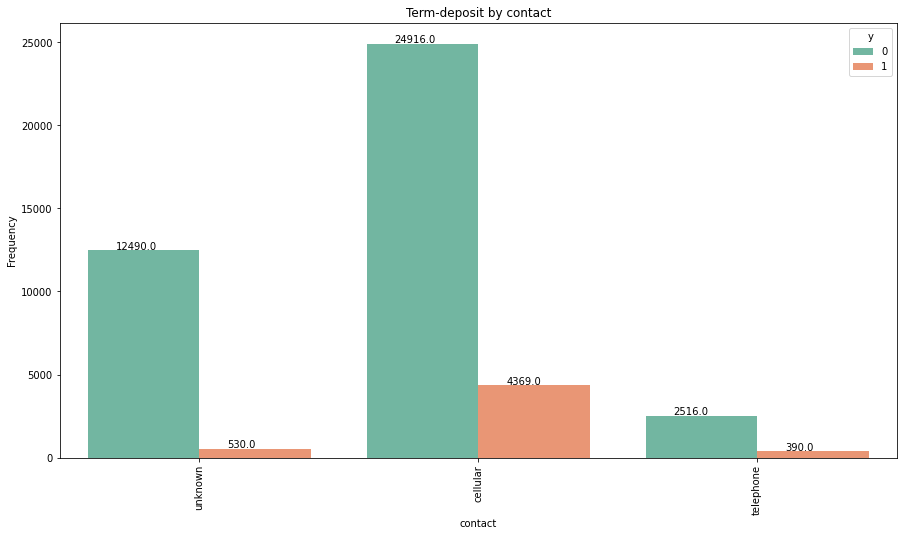

In [23]:
plt.figure(figsize=(15,8))
ax = sns.countplot(df1['contact'],hue = df1['y'], data=df1,palette ='Set2')
plt.title('Term-deposit by contact')
plt.xlabel('contact')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [24]:
df1.groupby(['contact','y'])['y'].count()/df1.groupby('contact')['y'].count()

contact    y
cellular   0    0.850811
           1    0.149189
telephone  0    0.865795
           1    0.134205
unknown    0    0.959293
           1    0.040707
Name: y, dtype: float64

Most of the customers have been contacted by cellular rather than telephone.But the subscription rate is same for both the cellular and telephone contacts. Thus we can say contacts made to the customer through the mode of telephone are more likely to subscribe for the term deposit.

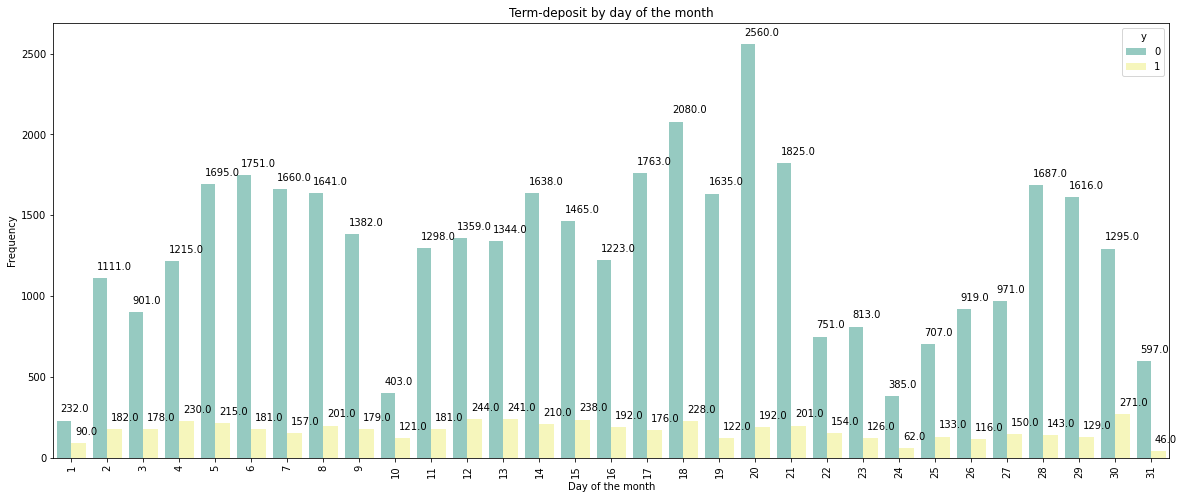

In [25]:
plt.figure(figsize=(20,8))
ax = sns.countplot(df1['day'],hue = df1['y'], data=df1,palette ='Set3')
plt.title('Term-deposit by day of the month')
plt.xlabel('Day of the month')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

* From the above plot it is clear that all the days have nearly the similar distribution for people subscribing for the term deposit. 
* Bank contacts more people between 17-21.

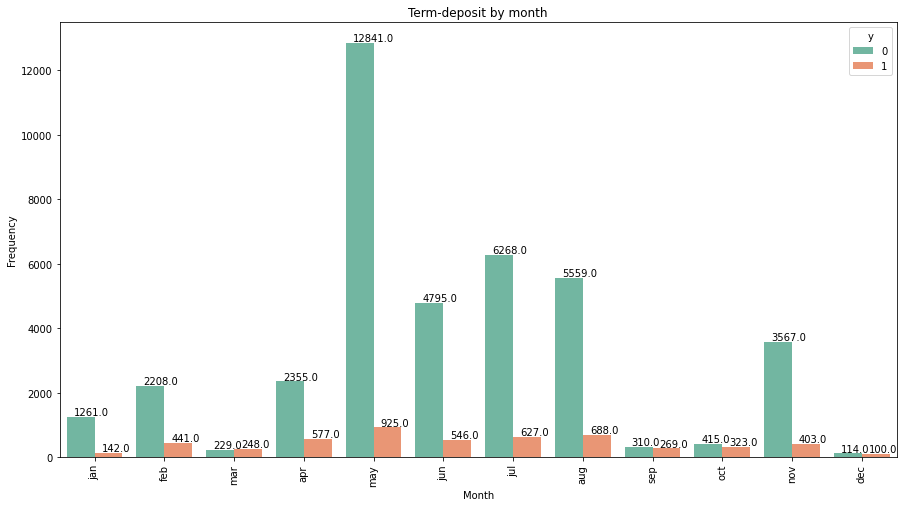

In [26]:
plt.figure(figsize=(15,8))
ax = sns.countplot(df1['month'],hue = df1['y'], data=df1,palette ='Set2',order= ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul','aug', 'sep', 'oct', 'nov', 'dec'] )
plt.title('Term-deposit by month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

* People have been contacted more in the month of May, followed by July, August, June,November. Very few people have been contacted in the month of December. 
* People contacted in May have higher chances to subscribe for  term deposits but have also higher chances for not subscribing the long term deposits. Very few people are contacted in the month of March, September,October,December  and have almost equal chances for subscribing the deposits or not.

Text(0, 0.5, 'Duration')

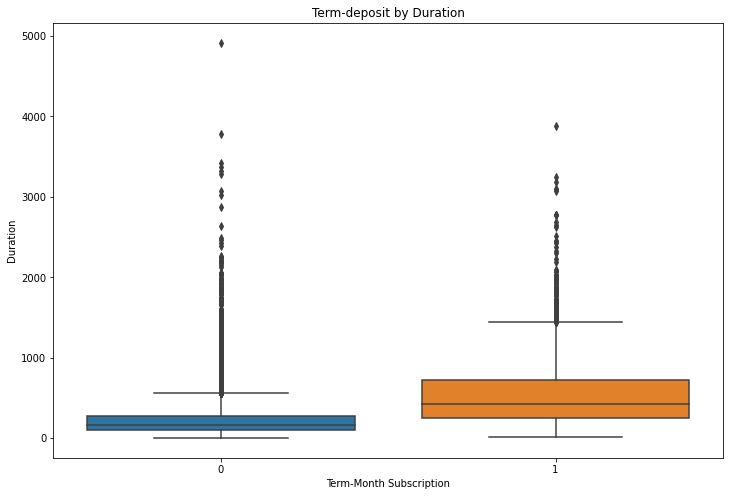

In [27]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df1['y'],y=df1['duration'])
plt.title('Term-deposit by Duration')
plt.xlabel('Term-Month Subscription')
plt.ylabel('Duration')

Customers who subscribed to term deposits have relatively higher duration.

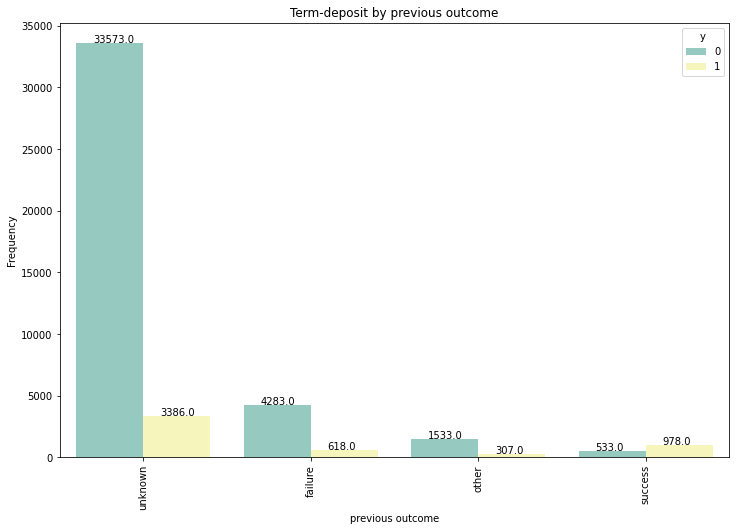

In [28]:
plt.figure(figsize=(12,8))
ax = sns.countplot(df1['poutcome'],hue = df1['y'], data=df1,palette ='Set3' )
plt.title('Term-deposit by previous outcome')
plt.xlabel('previous outcome')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [29]:
df1.groupby(['poutcome','y'])['y'].count()/df1.groupby('poutcome')['y'].count()

poutcome  y
failure   0    0.873903
          1    0.126097
other     0    0.833152
          1    0.166848
success   0    0.352747
          1    0.647253
unknown   0    0.908385
          1    0.091615
Name: y, dtype: float64

Outcome of the previous campaign is unknown for most of the customers but of the customers who had a successful outcome from the previous campaign, 64% of those customers did subscribe for a term deposit. 

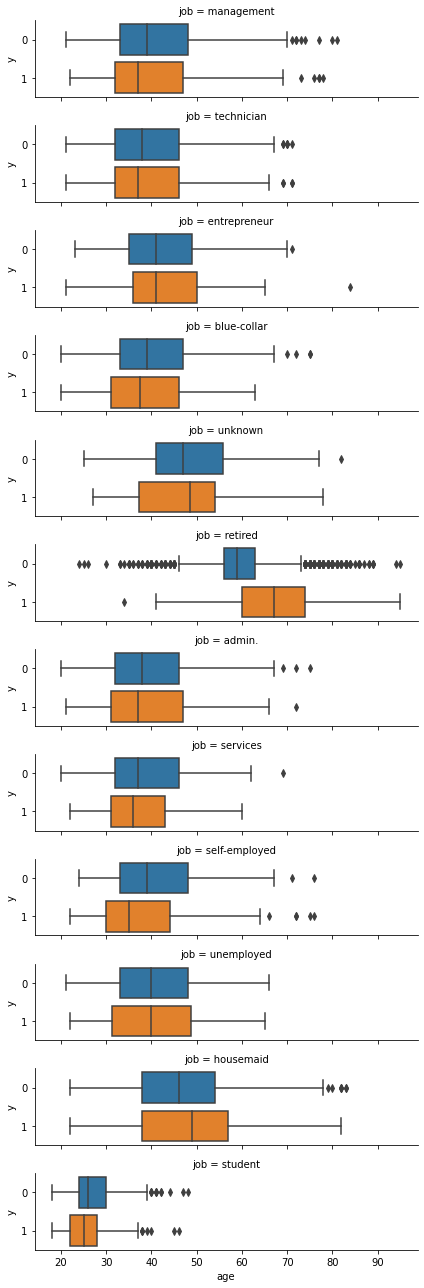

In [30]:
g = sns.catplot(x="age", y="y", row="job",
                kind="box", orient="h", height=1.5, aspect=4,
                data=df1)

* There is not much agewise difference in subscription to the term deposit if the job profile is entrepreneur, admin, unemployed.
* People of profession- management, technician, blue-collar, unknown, services,  self employed, student who subscribe to the term deposit are more likely to subscribe in their younger age.
* People of profession- unknown, retired, housemaid who subscribe to the term deposit have their mean age higher than those who don’t subscribe for the term deposit.


Text(0.5, 1.05, 'Pearson correlation of Features')

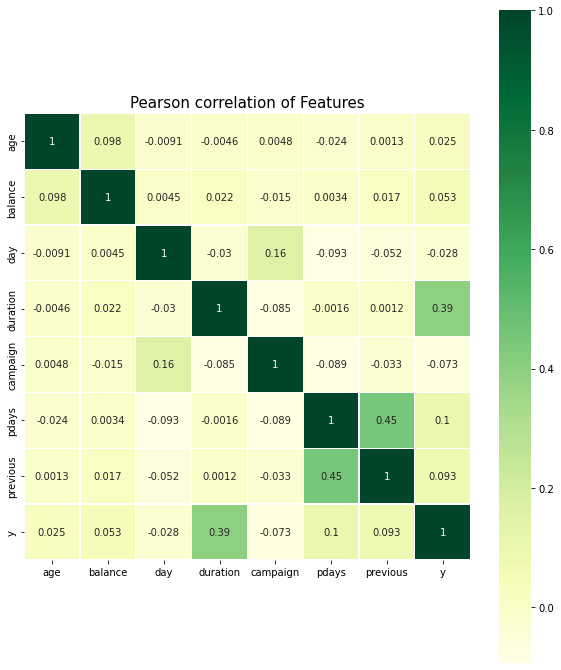

In [31]:
corr = df1.corr()
f, ax = plt.subplots(figsize=(10,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

Pday and previous has high correlation of 0.45 and pday has negative correqaltion with every other variable except balance.

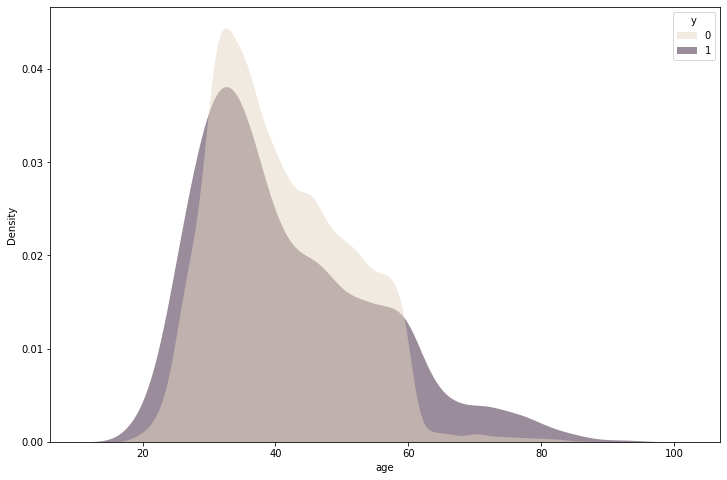

In [32]:
plt.figure(figsize=(12,8))
sns.kdeplot(
   data=df1, x="age", hue="y",
   fill=True, common_norm=False, palette="ch:.25",
   alpha=.5, linewidth=0,
)

The distribution of the customers who subscribed for the term deposit is relatively higher in the age group of 60-90.

#scale features

In [33]:
df1.loc[11812]

age               56
job          unknown
marital      married
education    unknown
default           no
balance            0
housing           no
loan              no
contact      unknown
day               20
month            jun
duration         471
campaign           2
pdays             -1
previous           0
poutcome     unknown
y                  0
age_bins       50-59
Name: 11812, dtype: object

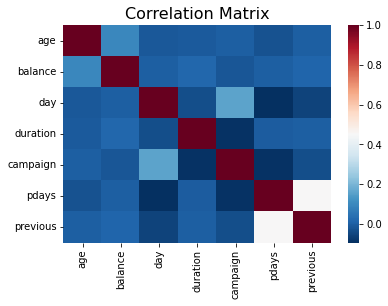

In [34]:
# Separate both dataframes into and correlation heatmap
numeric_df = df.select_dtypes(exclude="object")
categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_df.corr()


sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

Pday and previous has high correlation of 0.45 and pday has negative correqaltion with every other variable except balance.

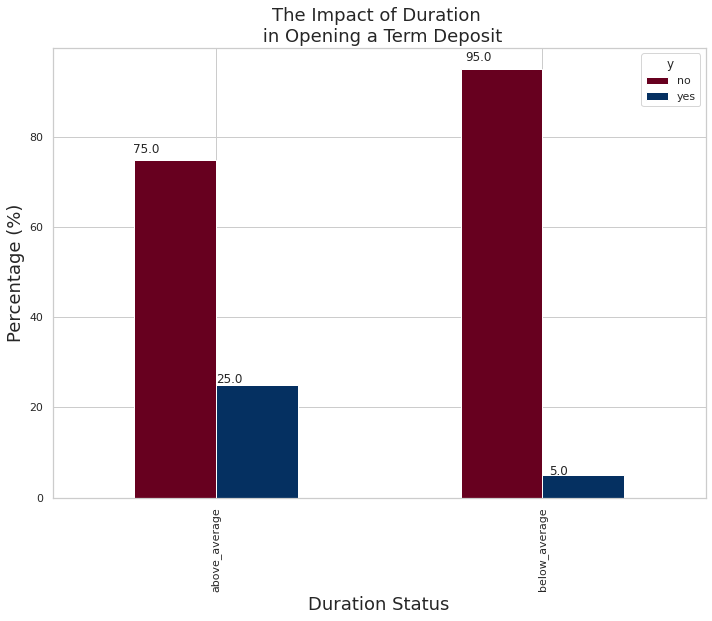

In [35]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
avg_duration = df['duration'].mean()

lst = [df]
df["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(df['duration_status'], df['y']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()

Customers whose duration status is above average has 25% chances of subscribing for term deposit.

#feature engineering

In [36]:
# creating copy of the original dataset
df1=df.copy()
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,duration_status
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,above_average
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,below_average
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,below_average
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,below_average
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,below_average


In [37]:
# deleting records which have high unknown values
df_unknown=df1.loc[(df["education"]=="unknown") & (df1["job"]=="unknown") & (df1["contact"]=="unknown") & (df1["poutcome"]=="unknown") & (df1["balance"]==0) ]
df_unknown

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,duration_status
9058,51,unknown,single,unknown,no,0,no,no,unknown,5,jun,409,1,-1,0,unknown,no,above_average
9456,35,unknown,married,unknown,no,0,no,no,unknown,6,jun,159,3,-1,0,unknown,no,below_average
9605,47,unknown,married,unknown,no,0,no,no,unknown,6,jun,466,2,-1,0,unknown,no,above_average
10168,58,unknown,married,unknown,no,0,no,no,unknown,11,jun,464,2,-1,0,unknown,no,above_average
11812,56,unknown,married,unknown,no,0,no,no,unknown,20,jun,471,2,-1,0,unknown,no,above_average


In [38]:
len(df_unknown)

5

In [39]:
df_unknown.index

Int64Index([9058, 9456, 9605, 10168, 11812], dtype='int64')

In [40]:
df1.drop(df_unknown.index,inplace=True)

In [41]:
df1=df1.drop(columns=["duration_status"],axis=0)

In [42]:
df1=df1.reset_index()

In [43]:
# quick check
df1.loc[(df["education"]=="unknown") & (df1["job"]=="unknown") & (df1["contact"]=="unknown") & (df1["poutcome"]=="unknown") & (df1["balance"]==0)]

,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


#classification and data preprocessing

#scaling and label encoding

In [44]:
#Label encoding and getting dummies for categorical variables
df1['default'] = df1['default'].map({'yes':1,'no':0})
df1['housing'] = df1['housing'].map({'yes':1,'no':0})
df1['loan'] = df1['loan'].map({'yes':1,'no':0})
df1['y'] = df1['y'].map({'yes':1,'no':0})
df1=pd.get_dummies(df1,columns=["job", "education", "marital", "contact", "month", "poutcome"])
df1.drop('index',axis=1,inplace=True)

In [45]:
# Here we split the data into training and test sets and implement a stratified shuffle split.
from sklearn.model_selection import StratifiedShuffleSplit
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_set, test_set in stratified.split(df1, df1["y"]):
    stratified_train = df1.loc[train_set]
    stratified_test = df1.loc[test_set]
    
stratified_train["y"].value_counts()/len(stratified_train['y']), stratified_test["y"].value_counts()/len(stratified_test['y'])

(0    0.883005
 1    0.116995
 Name: y, dtype: float64, 0    0.88299
 1    0.11701
 Name: y, dtype: float64)

In [46]:
# Separate the labels and the features.
train_data = stratified_train # Make a copy of the stratified training set.
test_data = stratified_test

test_data.shape,train_data.shape
# train_data['deposit'].value_counts()

((9042, 49), (36164, 49))

In [47]:
#dropping the dependent variable column from dataset
x_train=train_data.drop(columns=["y"])
x_test=test_data.drop(columns=["y"])

x_train.shape,x_test.shape

((36164, 48), (9042, 48))

In [48]:
#applying standar scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [49]:
y_train = train_data['y']
y_test = test_data['y']
y_train.shape,y_test.shape

((36164,), (9042,))

In [50]:
df1['y'].value_counts()

0    39917
1     5289
Name: y, dtype: int64

In [51]:
y_train.value_counts(),y_test.value_counts()

(0    31933
 1     4231
 Name: y, dtype: int64, 0    7984
 1    1058
 Name: y, dtype: int64)

In [52]:
# label encoding target variabel
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
y_train = encode.fit_transform(y_train)
y_test = encode.fit_transform(y_test)


In [53]:
# selecting best suitable classification model for this dataset
import time


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
     "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB(),
    "XgBoost": XGBClassifier()

}

In [54]:
x_train_sc

array([[-0.9363499 , -0.13560482, -0.20818654, ..., -0.20481695,
        -0.18589709, -2.12176854],
       [ 1.41776528, -0.13560482, -0.44108117, ..., -0.20481695,
        -0.18589709,  0.47130494],
       [ 1.13527146, -0.13560482, -0.73409895, ..., -0.20481695,
        -0.18589709,  0.47130494],
       ...,
       [ 0.75861303, -0.13560482, -0.36080685, ..., -0.20481695,
        -0.18589709,  0.47130494],
       [-1.31300833, -0.13560482, -0.38360079, ..., -0.20481695,
        -0.18589709,  0.47130494],
       [ 0.00529617, -0.13560482, -0.40309126, ..., -0.20481695,
        -0.18589709,  0.47130494]])

In [55]:
no_classifiers = len(dict_classifiers.keys())
from sklearn.metrics import f1_score

def batch_classify(X_train, Y_train,x_test,y_test,verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,5)), columns = ['classifier', 'train_score', 'training_time','train_f1_score','test_f1_score'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.clock()
        classifier.fit(X_train, Y_train)

        t_end = time.clock()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        f1_score1_train= f1_score(Y_train,classifier.predict(X_train))
        f1_score1_test= f1_score(y_test, classifier.predict(x_test))
       
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        df_results.loc[count,'train_f1_score'] = f1_score1_train
        df_results.loc[count,'test_f1_score'] = f1_score1_test
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results


df_results = batch_classify(x_train_sc, y_train,x_test_sc,y_test)
print(df_results.sort_values(by='train_score', ascending=False))

trained Logistic Regression in 0.43 s
trained Nearest Neighbors in 0.01 s
trained Linear SVM in 55.54 s
trained Gradient Boosting Classifier in 9.87 s
trained Decision Tree in 0.62 s
trained Random Forest in 1.19 s
trained Neural Net in 40.85 s
trained Naive Bayes in 0.08 s
trained XgBoost in 6.88 s
                     classifier  train_score  training_time  train_f1_score  \
4                 Decision Tree     1.000000       0.615366        1.000000   
5                 Random Forest     0.997041       1.185000        0.987202   
2                    Linear SVM     0.918814      55.543524        0.545370   
1             Nearest Neighbors     0.917266       0.006022        0.556215   
3  Gradient Boosting Classifier     0.911072       9.867139        0.532422   
8                       XgBoost     0.909330       6.883252        0.504008   
6                    Neural Net     0.909081      40.849268        0.513897   
0           Logistic Regression     0.900813       0.432950        

In [56]:
df_resutls=pd.DataFrame(df_results,columns=['classifier', 'train_score', 'training_time','train_f1_score','test_f1_score'])
df_resutls

,classifier,train_score,training_time,train_f1_score,test_f1_score
0,Logistic Regression,0.900813,0.432950,0.444651,0.455808
1,Nearest Neighbors,0.917266,0.006022,0.556215,0.384615
2,Linear SVM,0.918814,55.543524,0.545370,0.439871
3,Gradient Boosting Classifier,0.911072,9.867139,0.532422,0.500600
4,Decision Tree,1.000000,0.615366,1.000000,0.486204
5,Random Forest,0.997041,1.185000,0.987202,0.457921
6,Neural Net,0.909081,40.849268,0.513897,0.493961
7,Naive Bayes,0.853998,0.077710,0.440796,0.453961
8,XgBoost,0.909330,6.883252,0.504008,0.474829


#cross validation to avoid overfitting

In [57]:
# # # Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, x_train_sc, y_train, cv=3)
log_reg_mean = log_scores.mean()

# # SVC
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, x_train_sc, y_train, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, x_train_sc, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, x_train_sc, y_train, cv=3)
tree_mean = tree_scores.mean()

# # Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, x_train_sc, y_train, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, x_train_sc, y_train, cv=3)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, x_train_sc, y_train, cv=3)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, x_train_sc, y_train, cv=3)
nav_mean = nav_scores.mean()

# Naives Bayes
xgb_clf = GaussianNB()
xgb_scores = cross_val_score(xgb_clf, x_train_sc, y_train, cv=3)
xgb_mean = xgb_scores.mean()

In [58]:
# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Neural Classifier', 'Naives Bayes','XGB CLF'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean, nav_mean, xgb_mean]}

result_df = pd.DataFrame(data=d)
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores
6,Neural Classifier,0.906620
4,Grad B CLF,0.905320
5,Rand FC,0.902693
1,SVC,0.902417
0,Logistic Reg.,0.900730
2,KNN,0.892462
3,Dec Tree,0.877862
7,Naives Bayes,0.852644
8,XGB CLF,0.852644


In [59]:
#INSTANCE
from sklearn.model_selection import cross_val_score
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, x_train_sc, y_train, cv=3)
grad_mean = grad_scores.mean()

In [60]:
# Cross validate our Gradient Boosting Classifier
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(grad_clf, x_train_sc, y_train, cv=10)

In [61]:
from sklearn.metrics import accuracy_score
print ("Gradient Boost Classifier accuracy is %2.2f" % accuracy_score(y_train, y_train_pred))

Gradient Boost Classifier accuracy is 0.91


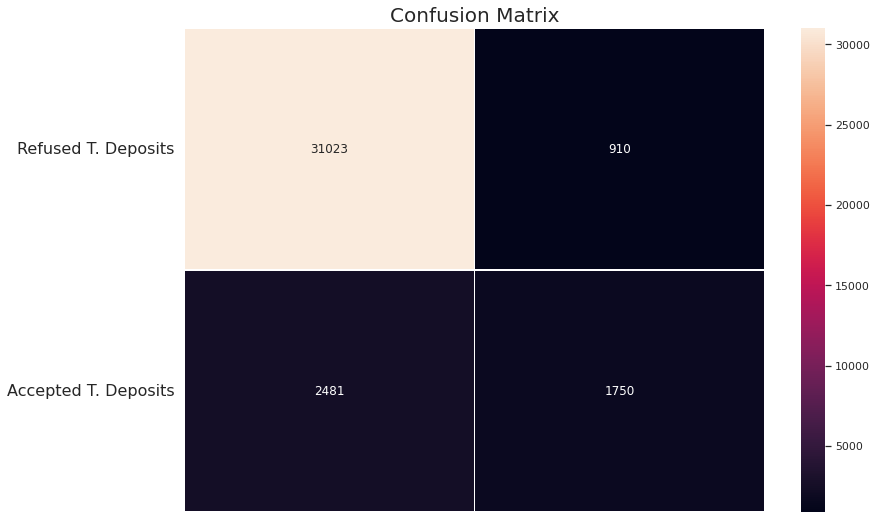

In [62]:
#confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_train, y_train_pred)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

In [63]:
# Let's find the scores  for precision and recall.
from sklearn.metrics import precision_score, recall_score
# The model is 65% sure that the potential client will suscribe to a term deposit. 
print('Precision Score: ', precision_score(y_train, y_train_pred))
# The classifier only detects 41% of potential clients that will suscribe to a term deposit.
print('Recall Score: ', recall_score(y_train, y_train_pred))

Precision Score:  0.6578947368421053
Recall Score:  0.4136138028834791


In [64]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred)

0.5079088666376433

In [65]:
#macro f1 score
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred,average ='macro')

0.7280440156652006

In [66]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_train, y_train_pred, sample_weight=None)


0.474181389874453

In [67]:
grad_clf.fit(x_train_sc, y_train)
y_test_pred= grad_clf.predict(x_test_sc)

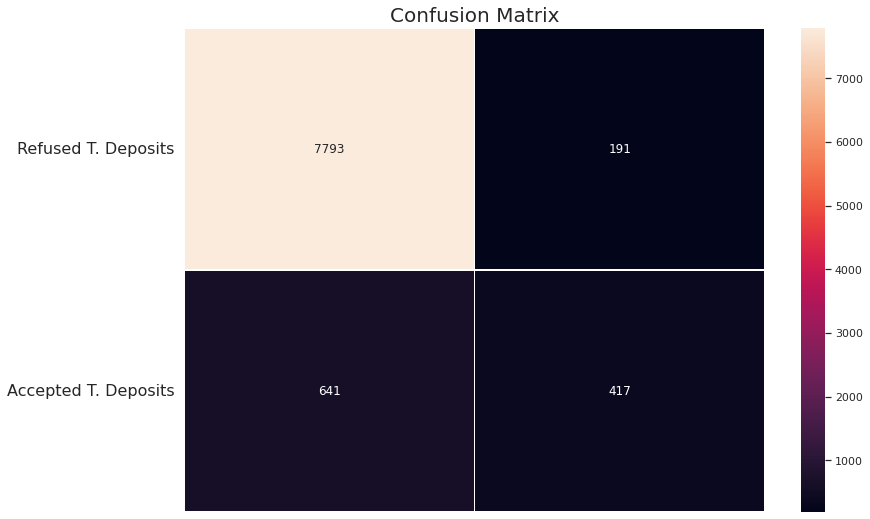

In [68]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_test_pred)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

In [69]:
y_test_pred= grad_clf.predict(x_test_sc)
# Let's find the scores  for precision and recall.
from sklearn.metrics import precision_score, recall_score
# The model is 68% sure that the potential client will suscribe to a term deposit. 
print('Precision Score: ', precision_score(y_test, y_test_pred))
# The classifier only detects 39% of potential clients that will suscribe to a term deposit.
print('Recall Score: ', recall_score(y_test, y_test_pred))

Precision Score:  0.6858552631578947
Recall Score:  0.3941398865784499


In [70]:
from sklearn.metrics import f1_score

f1_score(y_test, y_test_pred)

0.5006002400960385

In [71]:
#macro f1 score
from sklearn.metrics import f1_score

f1_score(y_test, y_test_pred,average ='macro')

0.7249620764373481

In [72]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_test_pred, sample_weight=None)

0.47516113957601586

#Handling imbalanced target variable using SMOTE

In [73]:
pip install imblearn 

In [74]:
from imblearn.over_sampling import SMOTE

In [75]:
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
print("Before OverSampling, counts of label '1': {}".format(sum(df1['y'] == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(df1['y'] == 0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train_smote, y_train_smote = sm.fit_resample(df1.loc[:, df1.columns != 'y'], df1['y'])
  
print('After OverSampling, the shape of train_X: {}'.format(x_train_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_smote == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smote == 0)))

Before OverSampling, counts of label '1': 5289
Before OverSampling, counts of label '0': 39917 

After OverSampling, the shape of train_X: (79834, 48)
After OverSampling, the shape of train_y: (79834,) 

After OverSampling, counts of label '1': 39917
After OverSampling, counts of label '0': 39917


In [76]:
from sklearn.preprocessing import StandardScaler
x_train_smote_sc = StandardScaler().fit_transform(x_train_smote)

In [77]:
from sklearn.model_selection import train_test_split

xx_train_smote, xx_test_smote, yy_train_smote, yy_test_smote = train_test_split(x_train_smote_sc, y_train_smote, test_size = 0.2, random_state = 3)

#Hyper parameter tunning

In [78]:
#hyperparameters
# gbc = GradientBoostingClassifier(random_state = 42)
# parameters = {
    # "n_estimators":[50,250,500],
    # "max_depth":[3,5,9],
    # 'min_samples_split':[200,500],'min_samples_leaf':[50,100],max_features:['auto', 'sqrt', 'log2']}

In [79]:
# #hyperparameter tuning using GridSearchCV
# clf = GridSearchCV(gbc, parameters,scoring=f1_score,cv=5, n_jobs=-1,verbose=10)

# clf.fit(xx_train_smote, yy_train_smote)
# clf.best_estimator_


# This hyperparameter tunning section takes very high time so we have already ran it and collected best performing parameter values and used in below code

In [80]:
# # Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier(n_estimators=40)
grad_scores = cross_val_score(grad_clf, xx_train_smote, yy_train_smote, cv=3)
grad_mean = grad_scores.mean()

In [81]:
# Cross validate our Gradient Boosting Classifier
from sklearn.model_selection import cross_val_predict

In [82]:
y_train_smote_pred = cross_val_predict(grad_clf,xx_train_smote, yy_train_smote , cv=5)

In [83]:
y_test_smote_pred = cross_val_predict(grad_clf,xx_test_smote, yy_test_smote , cv=5)

In [84]:
from sklearn.metrics import accuracy_score
print ("Gradient Boost Classifier accuracy is %2.2f" % accuracy_score(yy_train_smote, y_train_smote_pred))

Gradient Boost Classifier accuracy is 0.92


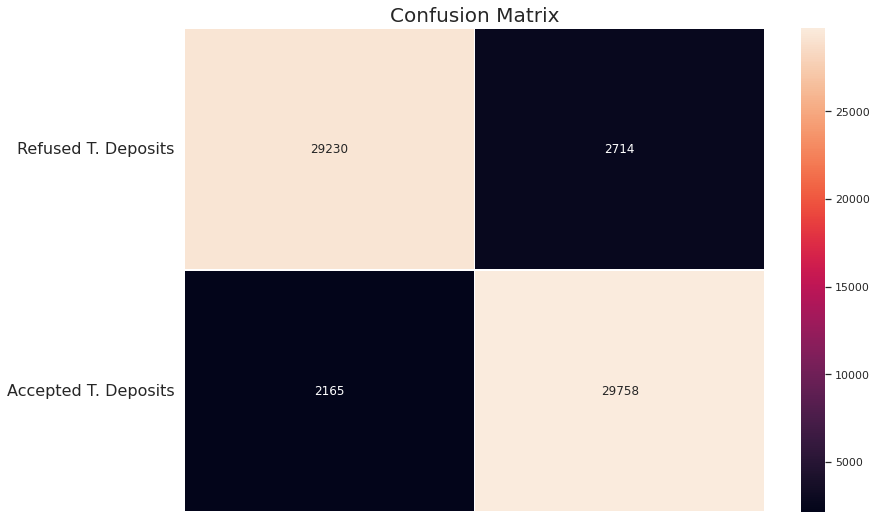

In [85]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(yy_train_smote,y_train_smote_pred )
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

In [86]:
# Let's find the scores  for precision and recall.
from sklearn.metrics import precision_score, recall_score
# The model is 92% sure that the potential client will suscribe to a term deposit. 
print('Precision Score: ', precision_score(yy_train_smote, y_train_smote_pred))
# The classifier only detects 91% of potential clients that will suscribe to a term deposit.
print('Recall Score: ', recall_score(yy_train_smote,y_train_smote_pred ))

Precision Score:  0.916420300566642
Recall Score:  0.9321805594712277


In [87]:
from sklearn.metrics import f1_score

f1_score(yy_train_smote, y_train_smote_pred)

0.9242332479229755

In [88]:
#macro f1 score
from sklearn.metrics import f1_score

f1_score(yy_train_smote, y_train_smote_pred,average ='macro')

0.9236016489855645

In [89]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(yy_train_smote, y_train_smote_pred, sample_weight=None)

0.8473398176828777

#Test dataset

In [90]:
grad_clf.fit(xx_train_smote, yy_train_smote)

GradientBoostingClassifier(n_estimators=40)

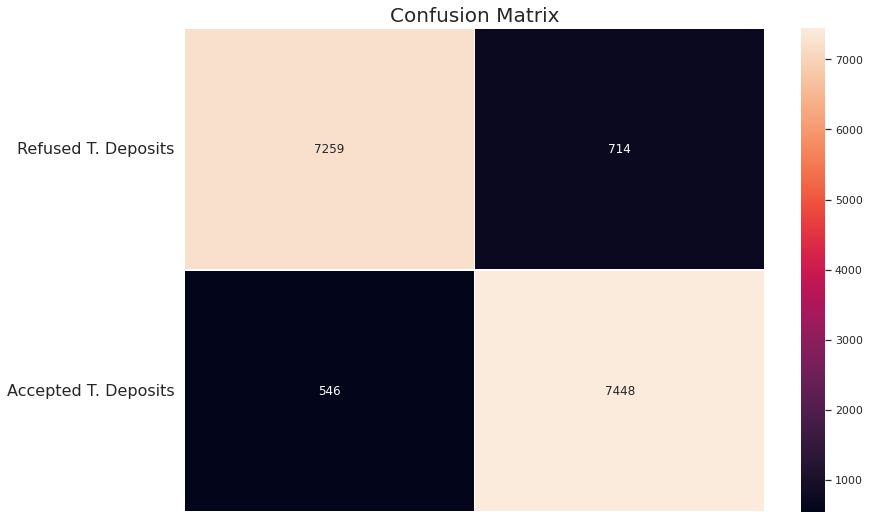

In [91]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(yy_test_smote,y_test_smote_pred )
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

In [92]:
#grad_clf.fit(xx_train_smote, yy_train_smote)
y_test_smote_pred= grad_clf.predict(xx_test_smote)
# Let's find the scores  for precision and recall.
from sklearn.metrics import precision_score, recall_score
# The model is 91% sure that the potential client will suscribe to a term deposit. 
print('Precision Score: ', precision_score(yy_test_smote, y_test_smote_pred))
# The classifier only detects 92% of potential clients that will suscribe to a term deposit.
print('Recall Score: ', recall_score(yy_test_smote, y_test_smote_pred))

Precision Score:  0.9187748015873016
Recall Score:  0.9268201150863148


In [93]:
from sklearn.metrics import f1_score

f1_score(yy_test_smote, y_test_smote_pred)

0.9227799227799228

In [94]:
f1_score(yy_test_smote, y_test_smote_pred, average ='macro')

0.9223373032896842

In [95]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(yy_test_smote, y_test_smote_pred, sample_weight=None)

0.8447100637904493

#tree visualization

In [96]:
#importing libraries for tree visualization
from sklearn import tree
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

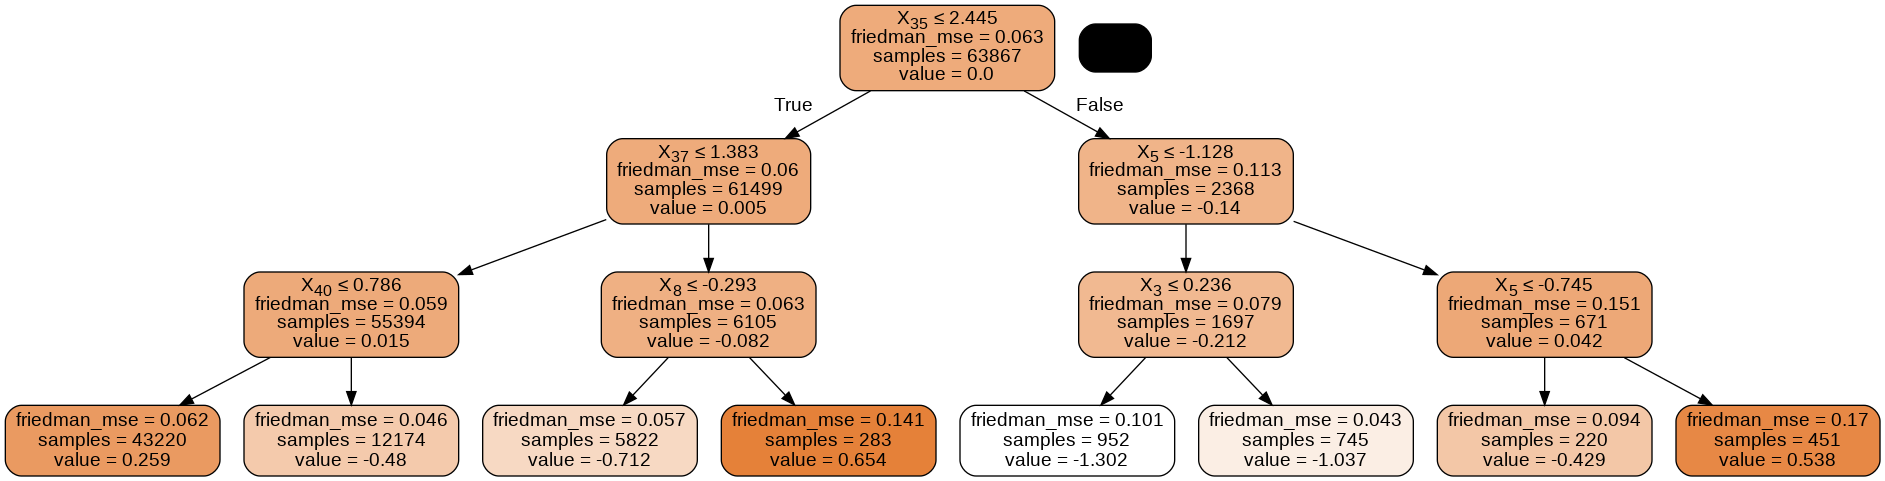

In [97]:
#tree visualization
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz
import numpy as np

# Classifier
clf = GradientBoostingClassifier(random_state=0,n_estimators=100)
clf.fit(xx_train_smote,yy_train_smote)

# Get the tree number 42
sub_tree_42 = clf.estimators_[42, 0]

# Visualization
# Install graphviz: https://www.graphviz.org/download/
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(
    sub_tree_42,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=True, # enable them if you want
)
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

#precision recall tradeoff

In [98]:
some_instance = x_train.iloc[1250]
some_instance

age                     32
default                  0
balance                172
housing                  1
loan                     0
day                     28
duration                84
campaign                 3
pdays                   -1
previous                 0
job_admin.               0
job_blue-collar          0
job_entrepreneur         0
job_housemaid            0
job_management           0
job_retired              0
job_self-employed        0
job_services             1
job_student              0
job_technician           0
job_unemployed           0
job_unknown              0
education_primary        0
education_secondary      1
education_tertiary       0
education_unknown        0
marital_divorced         0
marital_married          1
marital_single           0
contact_cellular         0
contact_telephone        0
contact_unknown          1
month_apr                0
month_aug                0
month_dec                0
month_feb                0
month_jan                0
m

In [99]:
grad_clf.predict_proba([some_instance])

array([[0.48031812, 0.51968188]])

In [100]:
# Let's see what does our classifier predict.
grad_clf.predict([some_instance]) 

array([1])

In [101]:
y_scores = grad_clf.decision_function([some_instance])
y_scores

array([0.0787682])

In [102]:
# Increasing the threshold decreases the recall.
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [103]:
y_scores = cross_val_predict(grad_clf, x_train, y_train, cv=5, method="decision_function")
neural_y_scores = cross_val_predict(neural_clf, x_train, y_train, cv=5, method="predict_proba")
naives_y_scores = cross_val_predict(nav_clf, x_train, y_train, cv=5, method="predict_proba")

In [104]:
# hack to work around issue #9589 introduced in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

if neural_y_scores.ndim == 2:
    neural_y_scores = neural_y_scores[:, 1]
    
if naives_y_scores.ndim == 2:
    naives_y_scores = naives_y_scores[:, 1]

In [105]:
neural_y_scores.shape,naives_y_scores.shape,y_scores.shape

((36164,), (36164,), (36164,))

In [106]:
# How can we decide which threshold to use? We want to return the scores instead of predictions with this code.
from sklearn.metrics import precision_recall_curve

precisions, recalls, threshold = precision_recall_curve(y_train, y_scores)

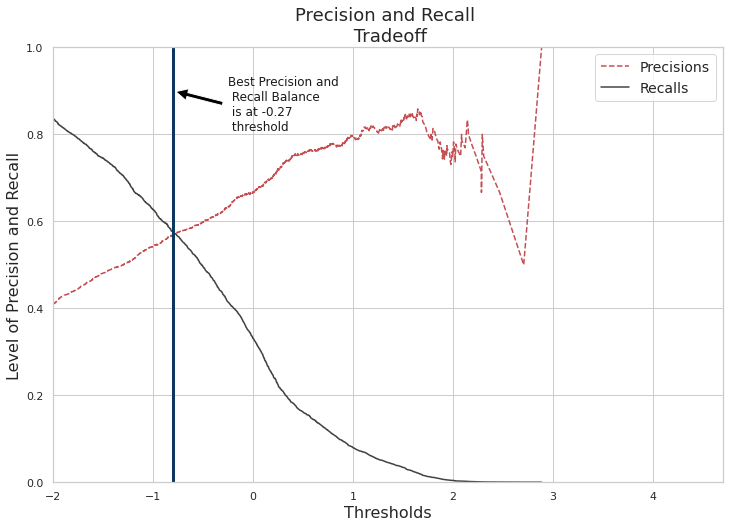

In [107]:
#defining function for precision recall tradeoff
def precision_recall_curve(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(thresholds, precisions[:-1], "r--", label="Precisions")
    plt.plot(thresholds, recalls[:-1], "#424242", label="Recalls")
    plt.title("Precision and Recall \n Tradeoff", fontsize=18)
    plt.ylabel("Level of Precision and Recall", fontsize=16)
    plt.xlabel("Thresholds", fontsize=16)
    plt.legend(loc="best", fontsize=14)
    plt.xlim([-2, 4.7])
    plt.ylim([0, 1])
    plt.axvline(x=-0.8, linewidth=3, color="#0B3861")
    plt.annotate('Best Precision and \n Recall Balance \n is at -0.27 \n threshold ', xy=(-0.8, 0.9), xytext=(55, -40),
             textcoords="offset points",
            arrowprops=dict(facecolor='black', shrink=0.05),
                fontsize=12, 
                color='k')
    
precision_recall_curve(precisions, recalls, threshold)
plt.show()

In [108]:
#roc curve
from sklearn.metrics import roc_curve
# Gradient Boosting Classifier
# Neural Classifier
# Naives Bayes Classifier
grd_fpr, grd_tpr, thresold = roc_curve(y_train, y_scores)
neu_fpr, neu_tpr, neu_threshold = roc_curve(y_train, neural_y_scores)

nav_fpr, nav_tpr, nav_threshold = roc_curve(y_train, naives_y_scores)

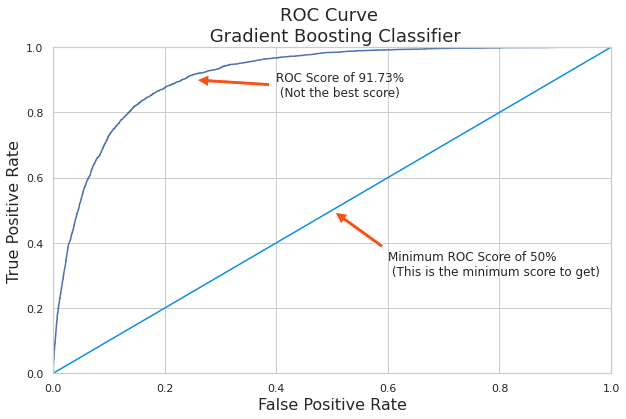

In [109]:
#roc curve
def graph_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.figure(figsize=(10,6))
    plt.title('ROC Curve \n Gradient Boosting Classifier', fontsize=18)
    plt.plot(false_positive_rate, true_positive_rate, label=label)
    plt.plot([0, 1], [0, 1], '#0C8EE0')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('ROC Score of 91.73% \n (Not the best score)', xy=(0.25, 0.9), xytext=(0.4, 0.85),
            arrowprops=dict(facecolor='#F75118', shrink=0.05),
            )
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#F75118', shrink=0.05),
                )
    
    
graph_roc_curve(grd_fpr, grd_tpr, threshold)
plt.show()

In [110]:
#roc_auc_score for different classifiers
from sklearn.metrics import roc_auc_score

print('Gradient Boost Classifier Score: ', roc_auc_score(y_train, y_scores))
print('Neural Classifier Score: ', roc_auc_score(y_train, neural_y_scores))
print('Naives Bayes Classifier: ', roc_auc_score(y_train, naives_y_scores))

Gradient Boost Classifier Score:  0.9122045394575145
Neural Classifier Score:  0.7715488829672129
Naives Bayes Classifier:  0.8197513712735947


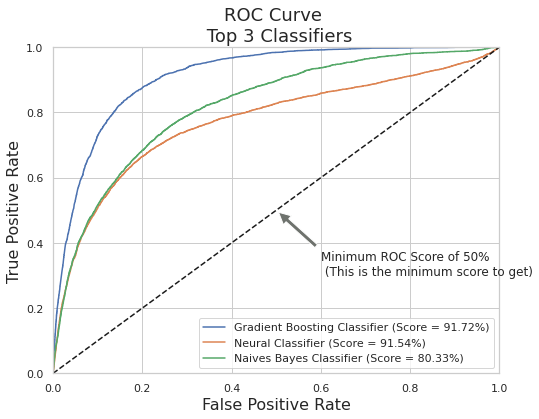

In [111]:
#roc curves
def graph_roc_curve_multiple(grd_fpr, grd_tpr, neu_fpr, neu_tpr, nav_fpr, nav_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Top 3 Classifiers', fontsize=18)
    plt.plot(grd_fpr, grd_tpr, label='Gradient Boosting Classifier (Score = 91.72%)')
    plt.plot(neu_fpr, neu_tpr, label='Neural Classifier (Score = 91.54%)')
    plt.plot(nav_fpr, nav_tpr, label='Naives Bayes Classifier (Score = 80.33%)')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(grd_fpr, grd_tpr, neu_fpr, neu_tpr, nav_fpr, nav_tpr)
plt.show()

#Model Interpretation Using SHAP

In [112]:
pip install shap

     |████████████████████████████████| 564 kB 5.5 MB/s 


In [113]:
import shap
# package used to calculate Shap values
# SHapley Additive exPlanations
# The goal of SHAP is to explain the prediction of an instance x by computing the contribution of each feature to the prediction. 
# The SHAP explanation method computes Shapley values from coalitional game theory. 
# The feature values of a data instance act as players in a coalition. 

In [114]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(grad_clf)
# Calculate Shap values
shap_values = explainer.shap_values(xx_train_smote[0:100])

#SHAP Feature importance

It is a basic insight into the model. In the following figure, you can see a comparison between feature importance calculated by SHAP values (features with large absolute Shapley values are important) and feature importance computed as the mean and standard deviation of accumulation of the impurity decrease within each tree (using scikit-learn [3]). As you can see they look quite similar but they are not the same.





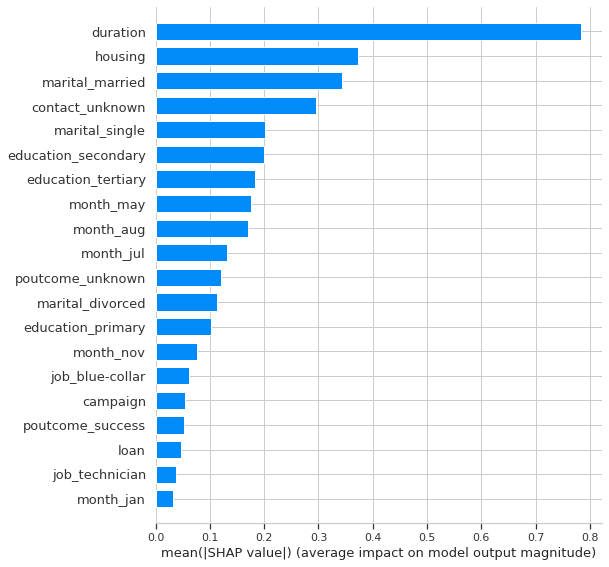

In [115]:
#plot using SHAP for topmost features
shap.summary_plot(shap_values,xx_train_smote[0:100], feature_names=x_train.columns, plot_type="bar")


#SHAP Summary Plot
The summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value of an instance per feature. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value of each instance. You can see that the feature is the most important feature, has a high Shapley value range. The color represents the value of the feature from low to high. Overlapping points are jittered in the y-axis direction, so we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance.

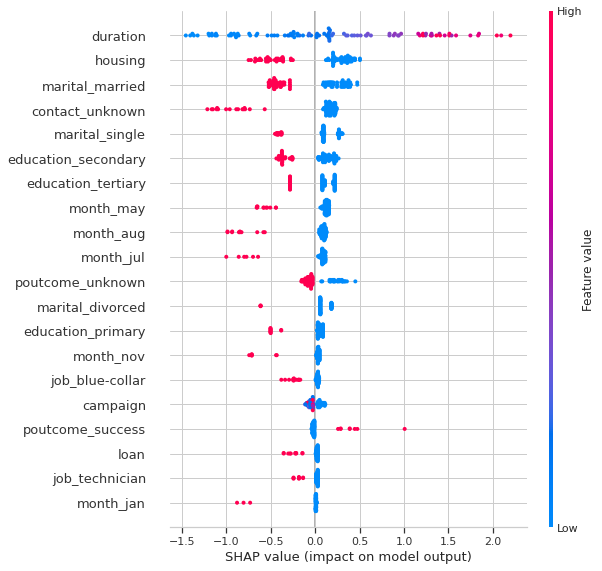

In [116]:
#summary plot
shap.summary_plot(shap_values,xx_train_smote[0:100], feature_names=x_train.columns)

#SHAP Dependence Plot

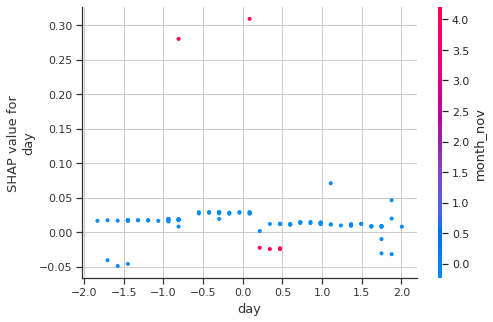

In [117]:
#dependence plot
shap.dependence_plot(x_train.columns[5], shap_values,xx_train_smote[0:100], feature_names=x_train.columns)

# conclusion

*   Months of Marketing Activity: We saw that the month of highest level of marketing activity was the month of May. However, this was the month that potential clients tended to reject term deposits offers For the next marketing campaign, it will be wise for the bank to focus the marketing campaign during the months of March, September, October and December.

*   Campaign Calls: A policy should be implemented that states that no more than 3 calls should be applied to the same potential client in order to save time and effort in getting new potential clients. Remember, the more we call the same potential client, the more likely he or she will decline to open a term deposit.


*   Age Category: The next marketing campaign of the bank should target potential clients in their 20s or younger and 60s or older. The youngest category had a 60% chance of subscribing to a term deposit while the eldest category had a 76% chance of subscribing to a term deposit. It will be great if for the next campaign the bank addressed these two categories and therefore, increased the likelihood of more term deposits subscriptions.

*   Occupation: Not surprisingly, potential clients that were students or retired were the most likely to subscribe to a term deposit. Retired individuals tend to have more term deposits in order to gain some cash through interest payments. Remember, term deposits are short-term loans in which the individual (in this case the retired person) agrees not to withdraw the cash from the bank until a certain date agreed between the individual and the financial institution. 
